In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def modifydata(train):
    fillzero = ['MasVnrArea',
                'GarageYrBlt', 
                'GarageArea', 
                'GarageCars', 
                'BsmtFinSF1', 
                'BsmtFinSF2', 
                'BsmtUnfSF',
                'TotalBsmtSF', 
                'BsmtFullBath', 
                'BsmtHalfBath']
    train[fillzero]=train[fillzero].replace(np.nan,0)
    
    fillnovalue = ['PoolQC', 
                'MiscFeature',
                'Alley',
                'Fence',
                'FireplaceQu',
                'GarageType', 
                'GarageFinish', 
                'GarageQual', 
                'GarageCond',
                'BsmtQual', 
                'BsmtCond', 
                'BsmtExposure', 
                'BsmtFinType1', 
                'BsmtFinType2',
                'MasVnrType',
                'MSSubClass']
    train[fillnovalue]=train[fillnovalue].replace(np.nan,'No Value')
    
    #Fill Mode
    fillmode = ['MSZoning', 
                'Electrical',
                'KitchenQual',
                'Exterior1st',
                'Exterior2nd',
                'SaleType']
    
    for column in fillmode:
        train[column] = train[column].fillna(train[column].mode()[0])
    
    #Fill Median with Neighborhood
    train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))
    
    newcolumns = []
    #Remove Outliers
    try:
        train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
    except:
        pass
    
               
    train = train.drop(columns=['Utilities'])
    
    train["Functional"] = train["Functional"].fillna("Typ")
    
    #divided columns
    dividecolumns = [('LotFrontage', 'LotArea'), 
                     ('GrLivArea', 'LotArea')]
    for column in dividecolumns:
        train[column[0] + '/' + column[1]] = train[column[0]]/train[column[1]]
        m = train.loc[train[column[0] + '/' + column[1]] != np.inf, column[0] + '/' + column[1]].max()
        train[column[0] + '/' + column[1]].replace(np.inf,m,inplace=True)
        newcolumns.append(column[0] + '/' + column[1])
        
    #year subtract columns
    yearcolumns = ['YearBuilt', 'YearRemodAdd', 'YrSold']
    for column in yearcolumns:
        train[column + 'Subtracted'] = 1/(datetime.today().year - train[column])
        newcolumns.append(column + 'Subtracted')
    
    #combine baths
    train['CombinedBaths'] = train['FullBath'] + 0.5 * train['HalfBath']
    
    #Square columns
    squarecolumns = ['LotArea', 'OverallQual', 'OverallCond', 'FullBath', 'HalfBath', 'CombinedBaths', 'TotRmsAbvGrd']
    squarecolumns.extend(newcolumns)
    for column in squarecolumns:
        train[column + 'Squared'] = train[column] ** 2
        newcolumns.append(column + 'Squared')
        
    #Log columns
    for column in train.columns:
        if column == 'Id' or column == 'MSSubClass' or column == 'SalePrice':
            continue
        if train[column][train[column] == 0].count() == 0:
            if train[column].dtypes == 'int64' or train[column].dtypes == 'float64':
                train[column + 'Logged'] = np.log10(train[column])
                newcolumns.append(column + 'Logged')



    
    
    return train



In [3]:
train = pd.read_csv('train.csv')
train = modifydata(train)
train.to_csv('traincleaned.csv')
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,YrSoldSubtractedLogged,LotAreaSquaredLogged,OverallQualSquaredLogged,OverallCondSquaredLogged,TotRmsAbvGrdSquaredLogged,LotFrontage/LotAreaSquaredLogged,GrLivArea/LotAreaSquaredLogged,YearBuiltSubtractedSquaredLogged,YearRemodAddSubtractedSquaredLogged,YrSoldSubtractedSquaredLogged
0,1,60,RL,65.0,8450,Pave,No Value,Reg,Lvl,Inside,...,-1.041393,7.853713,1.690196,1.39794,1.806180,-4.227887,-1.387721,-2.408240,-2.408240,-2.082785
1,2,20,RL,80.0,9600,Pave,No Value,Reg,Lvl,FR2,...,-1.079181,7.964542,1.556303,1.80618,1.556303,-4.158362,-1.762424,-3.266937,-3.266937,-2.158362
2,3,60,RL,68.0,11250,Pave,No Value,IR1,Lvl,Inside,...,-1.041393,8.102305,1.690196,1.39794,1.556303,-4.437287,-1.598542,-2.510545,-2.460898,-2.082785
3,4,70,RL,60.0,9550,Pave,No Value,IR1,Lvl,Corner,...,-1.113943,7.960007,1.690196,1.39794,1.690196,-4.403704,-1.490466,-4.034067,-3.380392,-2.227887
4,5,60,RL,84.0,14260,Pave,No Value,IR1,Lvl,FR2,...,-1.041393,8.308239,1.806180,1.39794,1.908485,-4.459680,-1.624184,-2.557507,-2.557507,-2.082785


In [4]:
train = pd.read_csv('test.csv')
train = modifydata(train)
train.to_csv('testcleaned.csv')
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,LotAreaSquaredLogged,OverallQualSquaredLogged,OverallCondSquaredLogged,CombinedBathsSquaredLogged,TotRmsAbvGrdSquaredLogged,LotFrontage/LotAreaSquaredLogged,GrLivArea/LotAreaSquaredLogged,YearBuiltSubtractedSquaredLogged,YearRemodAddSubtractedSquaredLogged,YrSoldSubtractedSquaredLogged
0,1461,20,RH,80.0,11622,Pave,No Value,Reg,Lvl,Inside,...,8.130562,1.397940,1.556303,0.000000,1.397940,-4.324382,-2.225946,-3.526856,-3.526856,-1.908485
1,1462,20,RL,81.0,14267,Pave,No Value,IR1,Lvl,Corner,...,8.308665,1.556303,1.556303,0.352183,1.556303,-4.491695,-2.061615,-3.570660,-3.570660,-1.908485
2,1463,60,RL,74.0,13830,Pave,No Value,IR1,Lvl,Inside,...,8.281644,1.397940,1.397940,0.795880,1.556303,-4.543181,-1.857802,-2.684845,-2.644439,-1.908485
3,1464,60,RL,78.0,9978,Pave,No Value,IR1,Lvl,Inside,...,7.998087,1.556303,1.556303,0.795880,1.690196,-4.213898,-1.587678,-2.644439,-2.644439,-1.908485
4,1465,120,RL,43.0,5005,Pave,No Value,IR1,HLS,Inside,...,7.398808,1.806180,1.397940,0.602060,1.397940,-4.131871,-1.184388,-2.862728,-2.862728,-1.908485


In [5]:
fillzero = ['LotFrontage',
                'MasVnrArea',
                'GarageYrBlt', 
                'GarageArea', 
                'GarageCars', 
                'BsmtFinSF1', 
                'BsmtFinSF2', 
                'BsmtUnfSF',
                'TotalBsmtSF', 
                'BsmtFullBath', 
                'BsmtHalfBath']
x=0

LotFrontage


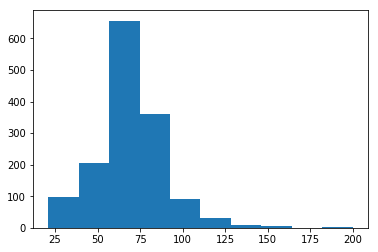

In [6]:
try:
    print(fillzero[x])
    plt.hist(train[fillzero[x]].tolist())
    x+=1
except:
    x+=1

MSSubClass


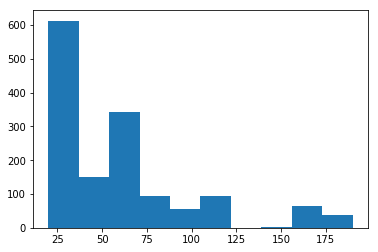

In [7]:
try:
    print(train.columns[x])
    plt.hist(train[train.columns[x]].tolist())
    x+=1
except:
    x+=1